In [19]:
# Data Set voorbereiden
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

DB = {"servername": "localhost\SQLEXPRESS",
      "database": "greatoutdoors"}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + DB['servername'] + 
                             ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

export_cursor = export_conn.cursor()


orders = pd.read_sql_query("SELECT * FROM orders;", export_conn)
products = pd.read_sql_query("SELECT * FROM Product;", export_conn)
product_type = pd.read_sql_query("SELECT * FROM product_type;", export_conn)
order_method = pd.read_sql_query("SELECT * FROM order_method;", export_conn)
country = pd.read_sql_query("SELECT * FROM country;", export_conn)
return_reason = pd.read_sql_query("SELECT * FROM return_reason;", export_conn)
retailer_site = pd.read_sql_query("SELECT * FROM retailer_site;", export_conn)
sales_staff = pd.read_sql_query("SELECT * FROM sales_staff;", export_conn)
sales_branch = pd.read_sql_query("SELECT * FROM sales_branch;", export_conn)



# orders = orders.merge(right=products, how="inner", left_on= "order_detail_product_number",right_on="PRODUCT_NUMBER").merge(right=product_type, how='inner', on="PRODUCT_TYPE_CODE").merge(right=retailer_site, how='inner', left_on="retailer_site_code", right_on="RETAILER_SITE_CODE").merge(order_method, left_on="order_method_code", right_on="order_method_code", how="inner").merge(country,left_on="RETAILER_SITE_COUNTRY_code", right_on="COUNTRY_CODE", how="inner").merge(return_reason, how="left", left_on="return_reason_code",right_on="RETURN_REASON_CODE")
orders = orders.merge(right=products, how="inner", left_on= "order_detail_product_number",right_on="PRODUCT_NUMBER").merge(right=product_type, how='inner', on="PRODUCT_TYPE_CODE").merge(right=retailer_site, how='inner', left_on="retailer_site_code", right_on="RETAILER_SITE_CODE").merge(order_method, left_on="order_method_code", right_on="order_method_code", how="inner").merge(country,left_on="RETAILER_SITE_COUNTRY_code", right_on="COUNTRY_CODE", how="inner").merge(return_reason, how="inner", left_on="return_reason_code",right_on="RETURN_REASON_CODE")
orders = orders.merge(right=sales_staff, how="left", left_on="sales_staff_code_fk",right_on="SALES_STAFF_CODE_PK").merge(right=sales_branch, how='left', left_on="SALES_STAFF_SALES_BRANCH_CODE", right_on="SALES_BRANCH_CODE")

# product_quantities_yearly = orders.groupby(['order_year', 'order_detail_product_number', 'order_detail_unit_cost', 'order_detail_unit_sale_price', 'order_detail_unit_price', "retailer_site_code", "MARGIN_NUMBER", "PRODUCTION_COST_NUMBER", "PRODUCT_TYPE_EN", "RETAILER_TYPE_EN", "PRODUCT_LINE_NAME", "CITY_name", "order_method_name", "COUNTRY_EN"])['order_detail_quantity'].sum().reset_index()

# product_quantities_yearly.columns =        ['Order Year', 'Product Number',              'order_detail_unit_cost', 'order_detail_unit_sale_price', 'order_detail_unit_price', "retailer_site_code", "MARGIN_NUMBER", "PRODUCTION_COST_NUMBER", "PRODUCT_TYPE_EN", "RETAILER_TYPE_EN", "PRODUCT_LINE_NAME", "CITY_name", "order_method_name", "COUNTRY_EN", 'Total Quantity Sold']

# dummies_frame = pd.get_dummies(product_quantities_yearly.loc[:, ['PRODUCT_TYPE_EN', 'RETAILER_TYPE_EN', "PRODUCT_LINE_NAME", "CITY_name", "order_method_name", "COUNTRY_EN"]])

# product_quantities_yearly = pd.concat([product_quantities_yearly, dummies_frame], axis=1)

# product_quantities_yearly = product_quantities_yearly.drop(["PRODUCT_TYPE_EN", "RETAILER_TYPE_EN", "PRODUCT_LINE_NAME", "CITY_name", "order_method_name", "COUNTRY_EN"], axis=1)

# # Afhankelijk - wat we willen voorspellen
# # Onafhankelijk - op basis van wat we willen voorspellen



# # X_train = Kolommen waarop je wilt trainen
# # X_test = Kolommen zoals x train

# # Y train = Resultaat die je wilt voorspellen
# # Y_test = Resultaat zoals y train


# Snijden 
# X = product_quantities_yearly.drop('Total Quantity Sold', axis=1)
# y = product_quantities_yearly.loc[:, ['Total Quantity Sold']]



# pd.get_option('display.max_rows')

# X
# y
# product_quantities_yearly # Onze dataset!
# print(len(orders))

# return_date, return_quantity, PRODUCT_TYPE_NAME, PRODUCT_LINE_NAME, PRODUCTION_COST_NUMBER, MARGIN_NUMBER
orders['return_date'] = orders['return_date'].fillna('1900-01-01')
orders['return_date'] = pd.to_datetime(orders['return_date'], errors='coerce')

orders['return_day'] = orders['return_date'].dt.day
orders['return_month'] = orders['return_date'].dt.month
orders['return_year'] = orders['return_date'].dt.year

dummies_frame = pd.get_dummies(orders.loc[:, ['PRODUCT_TYPE_EN', 'RETAILER_TYPE_EN', "PRODUCT_LINE_NAME", "RETAILER_SITE_CITY_name", "order_method_name", "COUNTRY_EN", "SALES_STAFF_POSITION_EN", ]])
orders = orders.loc[:, ["order_day", "order_month", "order_year", "order_detail_quantity", "order_detail_unit_cost", "order_detail_unit_price", "PRODUCTION_COST_NUMBER", "order_detail_unit_sale_price", "MARGIN_NUMBER", "return_reason_code"]]

print(orders.columns)
orders = pd.concat([orders, dummies_frame], axis=1)
# print(orders.columns)

orders['return_reason_code'].fillna(-1, inplace=True)
# orders['return_reason_code'].fillna(-1, inplace=True)
X = orders.drop('return_reason_code', axis=1)
y = orders.loc[:, ['return_reason_code']]

print(X)
# orders['return_date']
# orders
# dummies_frame

Index(['order_day', 'order_month', 'order_year', 'order_detail_quantity',
       'order_detail_unit_cost', 'order_detail_unit_price',
       'PRODUCTION_COST_NUMBER', 'order_detail_unit_sale_price',
       'MARGIN_NUMBER', 'return_reason_code'],
      dtype='object')
     order_day  order_month  order_year  order_detail_quantity  \
0           28            9        2020                     24   
1           14            3        2020                     84   
2            4            4        2020                     68   
3           26            3        2021                     40   
4           29            3        2021                    152   
..         ...          ...         ...                    ...   
701         10           12        2022                     90   
702         14            7        2020                     90   
703          5            8        2022                     24   
704         18            1        2021                     80   
705   

In [20]:
# Train/test set verdeling
import random
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = 42
)
X_train
# y_test

,order_day,order_month,order_year,order_detail_quantity,order_detail_unit_cost,order_detail_unit_price,PRODUCTION_COST_NUMBER,order_detail_unit_sale_price,MARGIN_NUMBER,PRODUCT_TYPE_EN_Binoculars,...,COUNTRY_EN_Spain,COUNTRY_EN_Sweden,COUNTRY_EN_Switzerland,COUNTRY_EN_Taiwan,COUNTRY_EN_United Kingdom,COUNTRY_EN_United States,SALES_STAFF_POSITION_EN_Branch Manager,SALES_STAFF_POSITION_EN_Level 1 Sales Representative,SALES_STAFF_POSITION_EN_Level 2 Sales Representative,SALES_STAFF_POSITION_EN_Level 3 Sales Representative
371,3,10,2022,34,79.19,99.00,79,94.05,0.20,True,...,False,False,False,False,False,False,False,False,False,True
176,28,4,2022,28,78.55,109.98,78,109.98,0.28,False,...,False,False,False,False,False,True,False,False,True,False
399,9,1,2022,94,6.75,13.50,6,13.50,0.50,False,...,False,False,False,False,False,False,True,False,False,False
215,18,6,2021,28,57.86,92.56,56,83.88,0.37,False,...,False,False,False,False,False,True,False,False,False,True
568,24,6,2021,22,37.81,54.09,34,54.09,0.30,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,17,8,2022,70,490.00,735.00,490,573.71,0.33,False,...,False,False,False,False,False,False,False,False,True,False
106,11,8,2022,60,166.66,250.00,166,229.16,0.33,False,...,False,False,False,False,False,False,False,False,False,True
270,22,12,2021,28,60.29,84.41,60,75.97,0.28,False,...,False,False,False,False,False,True,False,False,True,False
435,25,10,2021,84,3.90,7.80,4,7.80,0.50,False,...,False,False,False,False,False,False,False,False,False,True


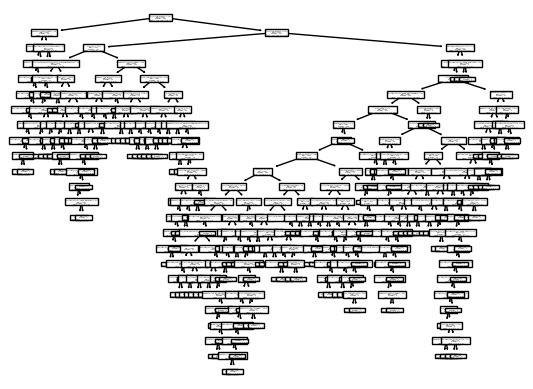

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names = X.columns)

plt.show()

In [22]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns = {0: 'Predicted Return Reason Code'})
model_results_frame = pd.concat([y_test.reset_index()['return_reason_code'], predicted_df], axis=1)
model_results_frame

,return_reason_code,Predicted Return Reason Code
0,5.0,1.0
1,1.0,1.0
2,1.0,5.0
3,1.0,5.0
4,5.0,1.0
...,...,...
172,1.0,4.0
173,2.0,2.0
174,1.0,2.0
175,1.0,2.0


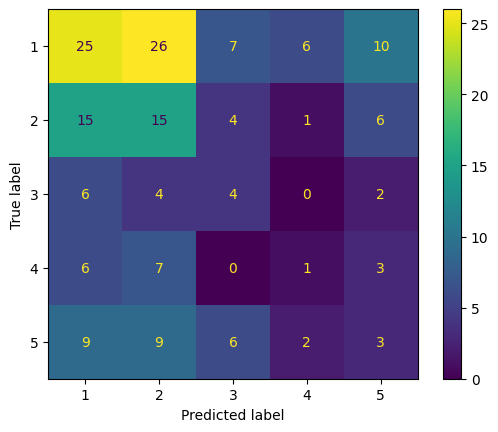

In [24]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['return_reason_code'], model_results_frame["Predicted Return Reason Code"])
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[-1, 1, 2, 3, 4, 5])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[1, 2, 3, 4, 5])


cm_display.plot()
plt.show()

# Overfitten zou moeten leiden tot een regressie, maar de accuracy is best hoog....
# Hoewel er de enige true positives -1 zijn (niet teruggebracht) en de andere niet goed voorspeld worden. Er zijn ongeveer 30k~ rijen die -1 zijn. Niet helemaal zeker.
# De boom is ook niet te diep (max_depth=2)

In [25]:
metrics.accuracy_score(model_results_frame["return_reason_code"], model_results_frame["Predicted Return Reason Code"])

0.2711864406779661